# Background extraction: Separating common image parts by average pixel intensities

> **Dataset [448]**

249 day and night images of <b>1640 × 1232 pixels</b> and <b>3280 x 2464 pixels</b> <u>normalised to 1640 × 1232 pixels.</u>

In [18]:
import os
import numpy as np
from PIL import Image
from IPython.display import display

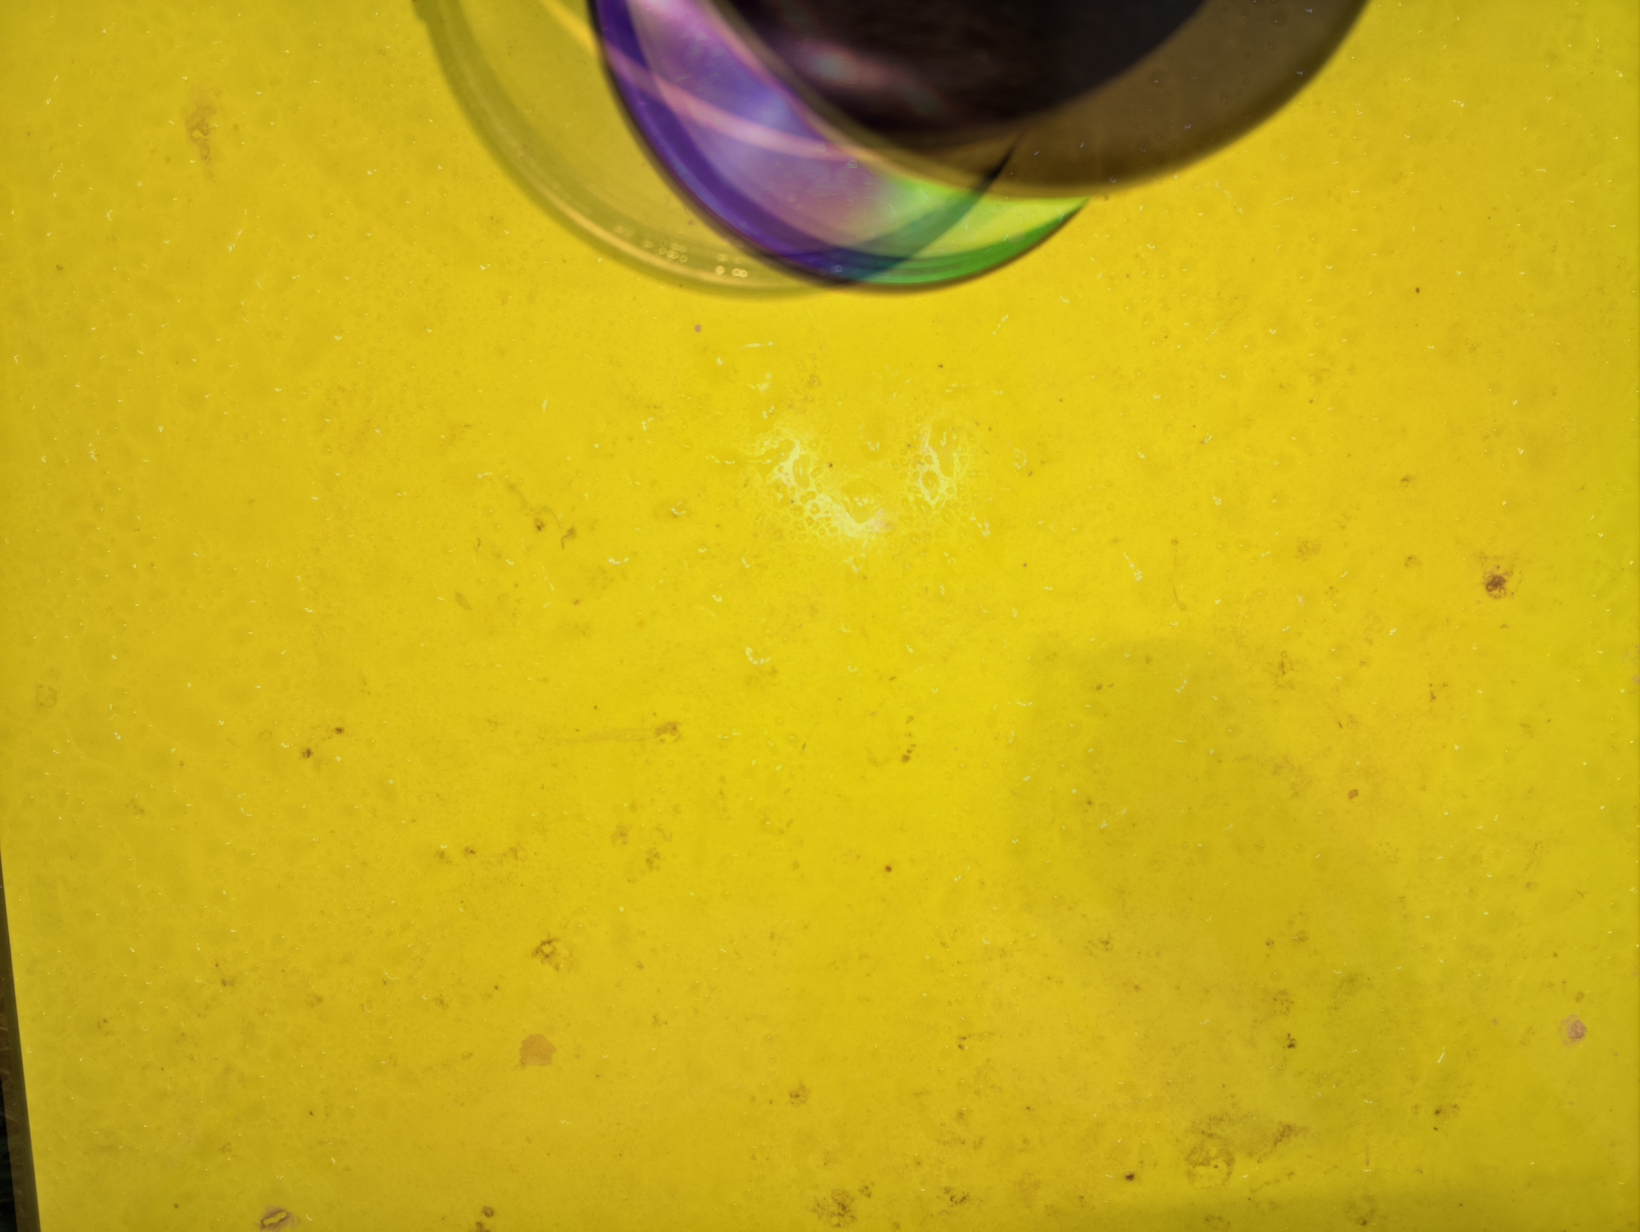

In [19]:
# Access all files in directory
allfiles = os.listdir(os.getcwd())
imlist = [filename for filename in allfiles if filename[-4:].lower() in [".jpg", ".jpeg"]]

# Ensure there are images to process
if not imlist:
    raise ValueError("No JPG images found in the current directory.")

# Determine target size from the first image so we normalise the 3280 x 2464 images to the same size as the 1640 x 1232 images
first_image = Image.open(imlist[0])
target_w, target_h = first_image.size

# Numpy array of floats to store the average (assume RGB images)
arr = np.zeros((target_h, target_w, 3), float)

# Build up average pixel intensities, resizing each image to target size
for im in imlist:
    img = Image.open(im)
    img_resized = img.resize((target_w, target_h), Image.Resampling.LANCZOS)
    imarr = np.array(img_resized, dtype=float)
    arr += imarr / len(imlist)  # Accumulate the average

# Round values in array and cast as 8-bit integer
arr = np.array(np.round(arr), dtype=np.uint8)

# Generate, save, and display the average image
out = Image.fromarray(arr, mode="RGB")
out.save("Average.png")
display(out)